In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# Problem 1: Feature Importance in Iris Classification
We return to the iris dataset from last week. Load it into the notebook and make a pair plot.

setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


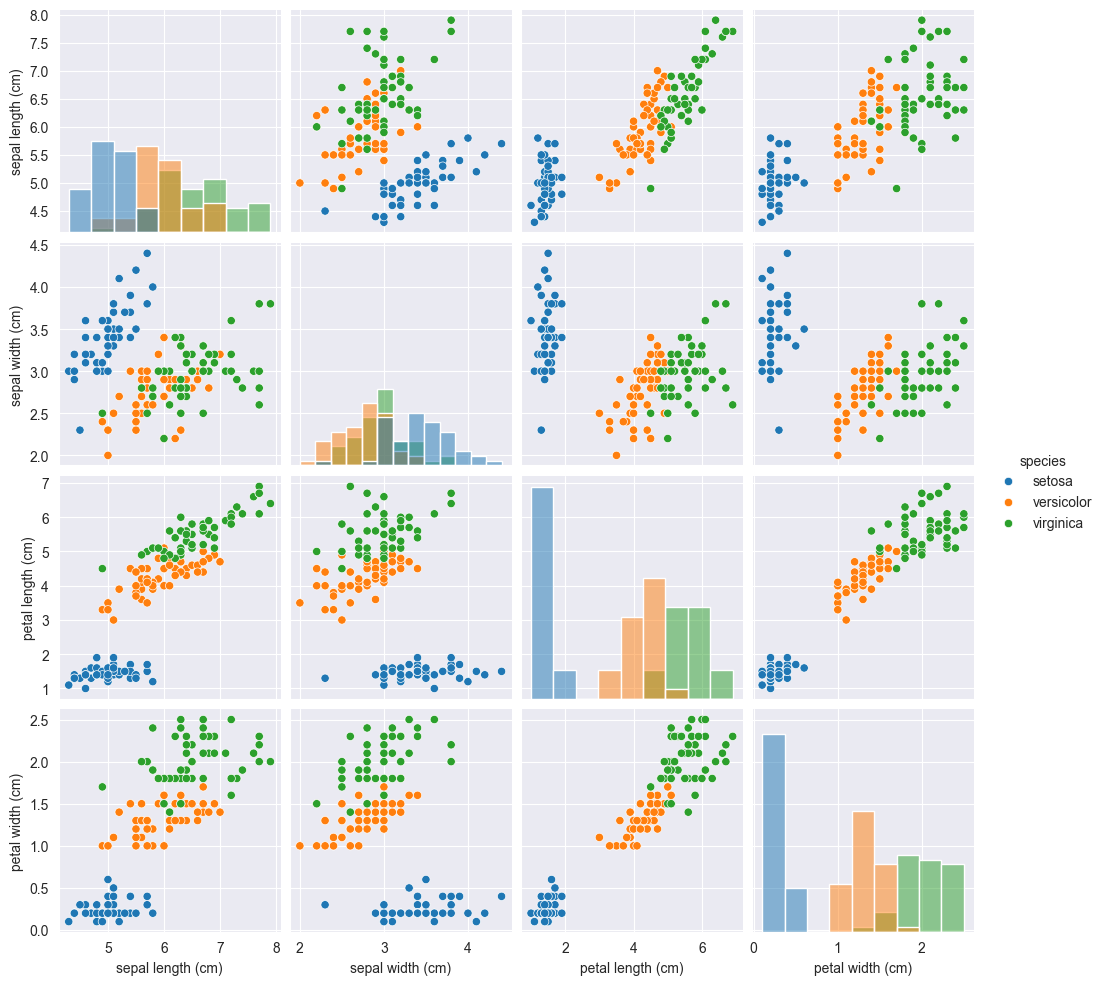

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
target = iris.target
target_names = iris.target_names

samples, counts = np.unique(target, return_counts = True)
for name, count in zip(target_names, counts):
    print(f"{name}: {count} samples")

import seaborn as sns
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Make the pair plot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

This time, let's classify it using a random forest. Initialize and train the random forest classifer using cross validation. Repeat the above plot with the predicted classifications and calculate the overall accuracy.

Overall Accuracy: 0.97


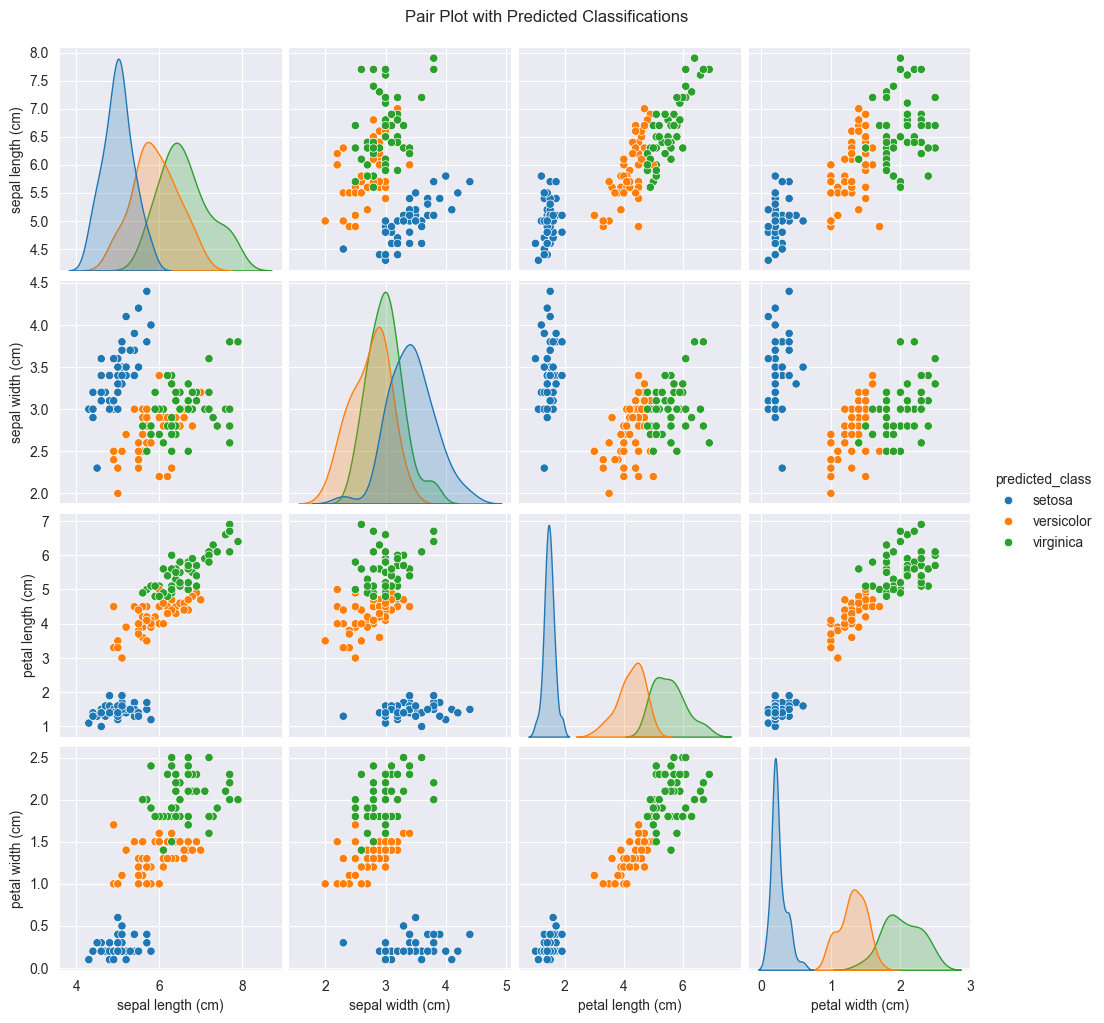

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

x = iris.data
y = iris.target

rfc = RandomForestClassifier(n_estimators=100, random_state=0) # random state is either 0 or 42
y_pred = cross_val_predict(rfc, x, y, cv=5)

df['predicted_class'] = pd.Categorical.from_codes(y_pred, target_names)
accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

# plot
sns.pairplot(df, hue='predicted_class')
plt.suptitle("Pair Plot with Predicted Classifications", y = 1.02)
plt.show()

Calculate the mean decrease in impurity and the permutation importance for each feature and plot them (*hint:* `plt.barh`). Which feature(s) seem to be the most useful for classification? Does this agree with your intuition from the plots?

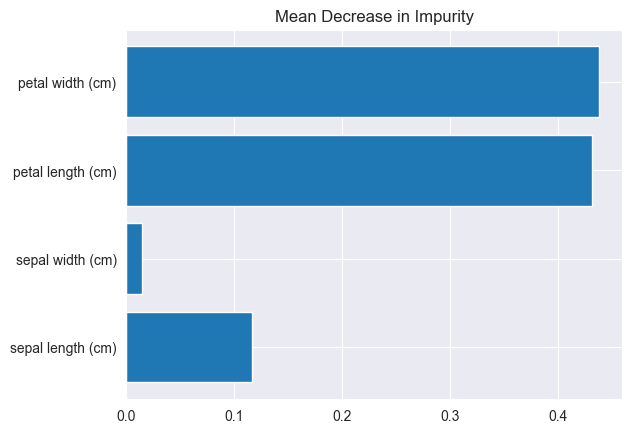

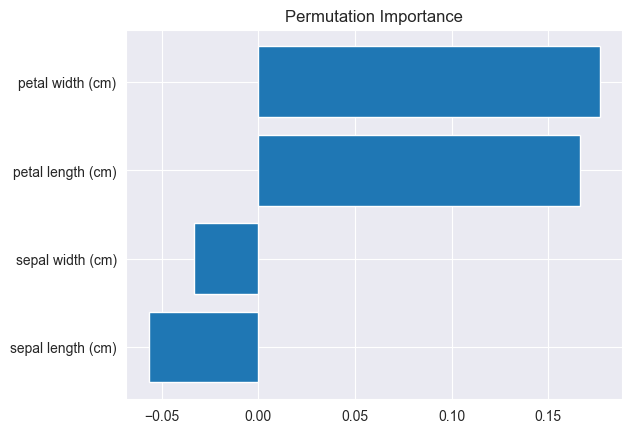

In [9]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

iris_names = iris.feature_names

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

mdi = rfc.feature_importances_ # mean decrease in impurity
pi = permutation_importance(rfc, x_test, y_test, n_repeats=10, random_state=42)
permutation_importances = pi.importances_mean

# plot
plt.barh(iris_names, mdi)
plt.title("Mean Decrease in Impurity")
plt.show()

plt.barh(iris_names, permutation_importances)
plt.title("Permutation Importance")
plt.show()

*Complete*

However, note from the pair plot that the petal length and width are strongly correlated. Pick one of these features and remove it from the data set. Then recalculate the accuracy and the feature importance using only 3 features. How do these change, and do the changes make sense given what you know about the data set?

Accuracy after removing feature: 0.90


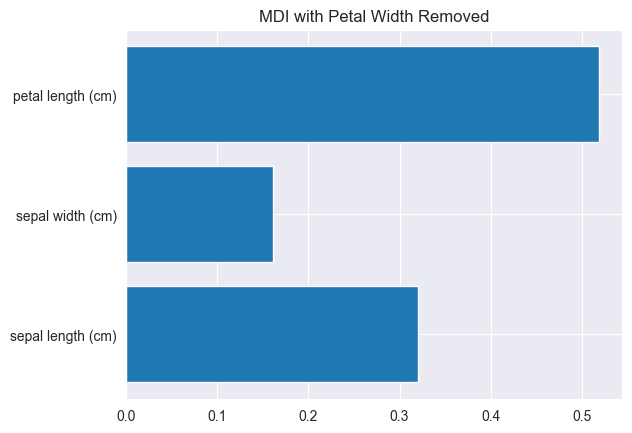

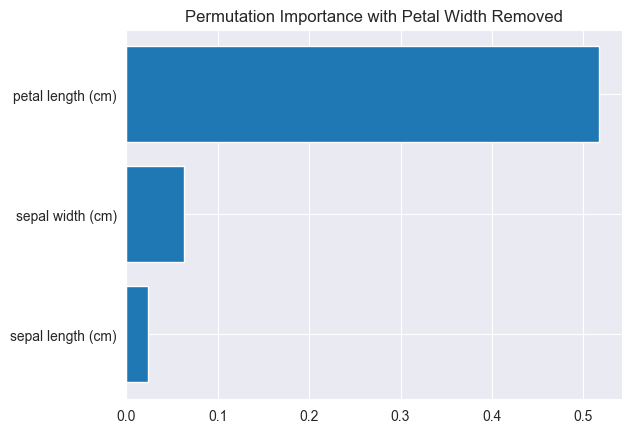

In [11]:
# remove petal width as one of the features

remove_petal = iris_names.index("petal width (cm)")
x_deleted = np.delete(iris.data, remove_petal, axis=1)
new_names = iris_names[:remove_petal] + iris_names[remove_petal+1:]

x_train, x_test, y_train, y_test = train_test_split(x_deleted, y, test_size=0.2, random_state=42, stratify=y)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after removing feature: {accuracy:.2f}")

mdi = rfc.feature_importances_
pi = permutation_importance(rfc, x_test, y_test, n_repeats=10, random_state=42)
permutation_importances = pi.importances_mean

plt.barh(new_names, mdi)
plt.title("MDI with Petal Width Removed")
plt.show()

plt.barh(new_names, permutation_importances)
plt.title("Permutation Importance with Petal Width Removed")
plt.show()

*Complete*

# Problem 2: Efficient Classification of a Higher Dimensional Data Set

As much time as we've spent on the iris data set, it is much simpler to understand and easier to classify than almost any data set you will encounter in the real world. Let's instead work with the wine data set, which includes 13 chemical and physical measurements of samples of wine from three different (anonymous) vineyards in Italy. Start by reading it in and plotting it. What do you notice about this data set? Are there any single features that divide the three classes cleanly? Will the ranges of the features cause any problems for our classifiers?

class_0: 59 samples
class_1: 71 samples
class_2: 48 samples


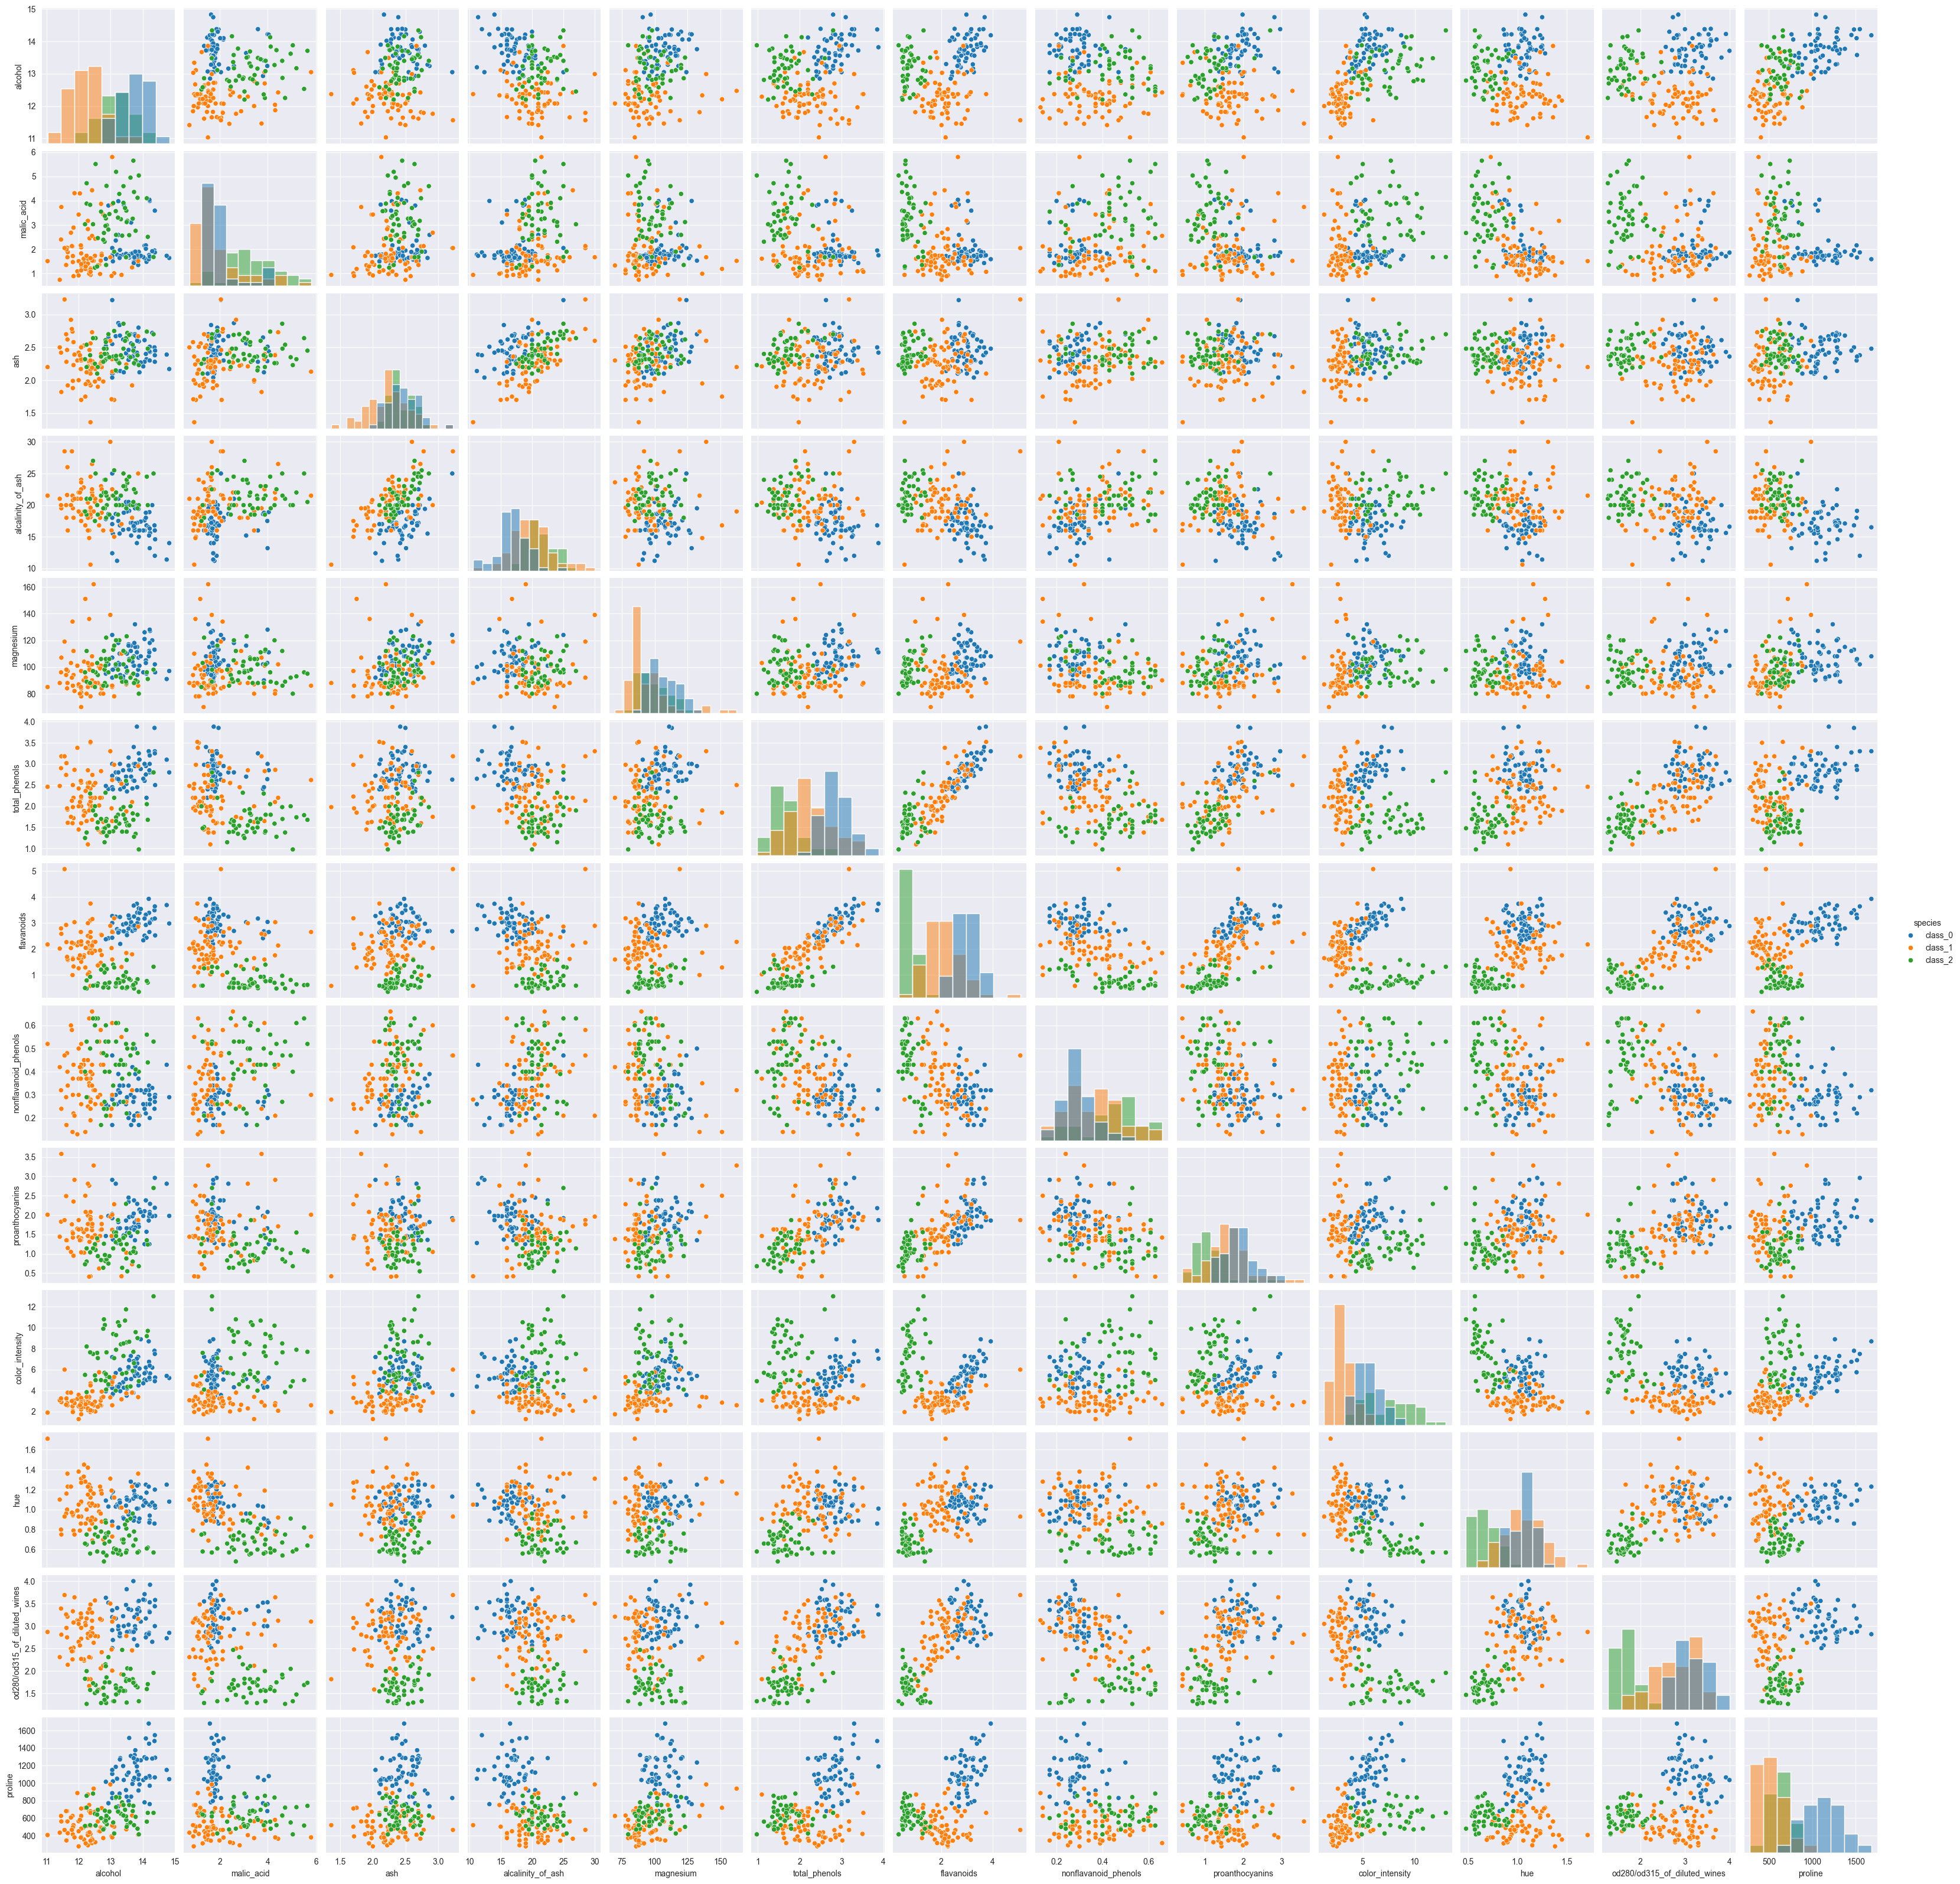

In [18]:
wine = datasets.load_wine()
glass = wine.target
glass_names = wine.target_names

cheese, fruits = np.unique(glass, return_counts = True)
for name, count in zip(glass_names, fruits):
    print(f"{name}: {count} samples")

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['species'] = pd.Categorical.from_codes(wine.target, wine.target_names)

# Make the pair plot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

This dataset is massive and has a lot of labels. I can't really read any of the labels so not sure about what can be determined here.

*Complete*

In the end, we would like to understand how our classifier works, so let's try to reduce the number of features to something more manageable. Apply a dimensionality reduction technique and decide how many features we can make do with. (This is intentionally very open-ended to make you think about it!) Comment on what you're doing.

In [ ]:
subset_features = ['alcohol', 'malic_acid', 'color_intensity', 'hue']
sns.pairplot(df[subset_features + ['target']], hue='target', diag_kind='hist')
plt.suptitle("Wine Dataset - Selected Feature Pair Plot", y=1.02)
plt.show()



Using your newly engineered features, train a support vector machine with cross validation and calculate the accuracy.

In [ ]:
# complete
# complete
# complete

# complete
# complete

# complete
# complete

Lastly, because this is the interpretability notebook, we want to gain some understanding of how this classification procedure actually worked. Make a graph of how your new features relate to the original input features. Based on the graph, which of the original features are most influential in the final classification? Does your answer differ for different classes? How much of the total sample variance does each of the new features explain?

In [ ]:
# complete
# complete
# complete
# complete

# complete
# complete

*Complete*